In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.models import * 

In [ ]:
import pathlib
data_dir='/content/drive/MyDrive/ColabNotebooks/PNEUMONIA DATASET/chest_xray/test'
data_dir = pathlib.Path(data_dir)

In [ ]:
%cd drive/'My Drive/ColabNotebooks/PNEUMONIA DATASET'/

/content/drive/My Drive/ColabNotebooks/PNEUMONIA DATASET


(-0.5, 1599.5, 1529.5, -0.5)

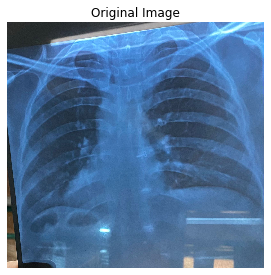

In [ ]:
import skimage
import numpy as np
from skimage import io as io
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.filters import gaussian
from skimage.filters import threshold_otsu
from skimage.measure import find_contours#Load the image
image = skimage.io.imread('/content/drive/MyDrive/ColabNotebooks/PNEUMONIA DATASET/chest_xray/test/Real_Xray.jpg')
io.imshow(image)
plt.title('Original Image')
plt.axis('off')

(-0.5, 1599.5, 1529.5, -0.5)

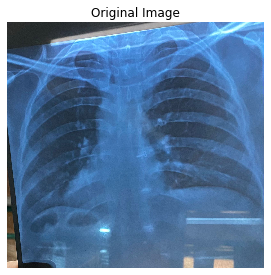

In [ ]:
#Load the image
image = skimage.io.imread('/content/drive/MyDrive/ColabNotebooks/PNEUMONIA DATASET/chest_xray/test/Real_Xray.jpg')
io.imshow(image)
plt.title('Original Image')
plt.axis('off')

Text(0.5, 1.0, 'Grayscale Denoised Image')

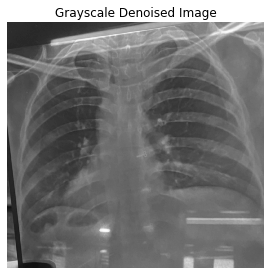

In [ ]:
#Produce the grayscale image
gray_image = rgb2gray(image)
#Denoise the image
denoised_image = gaussian(gray_image, sigma=2)
io.imshow(denoised_image)
plt.axis('off')
plt.title('Grayscale Denoised Image')

Text(0.5, 1.0, 'Binary Image')

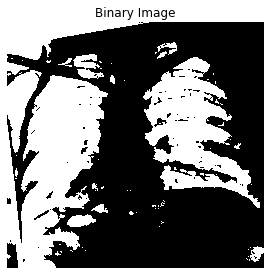

In [ ]:
#Find Otsu threshold 
thresh = threshold_otsu(denoised_image)
binary_image = denoised_image < thresh
#Create a mask for the binary image where holes are 
# white (1) and the rest is black (0)
binary = np.zeros(shape=binary_image.shape)
binary[binary_image] = 1
io.imshow(binary)
plt.axis('off')
plt.title('Binary Image') 

In [ ]:
#Find contours of the holes:
contours = find_contours(binary, level=0.8)
print('{} holes were detected in this x ray image.'.format(len(contours)))

234 holes were detected in this x ray image.


Text(0.5, 1.0, 'Grayscale Image with Detected Contours')

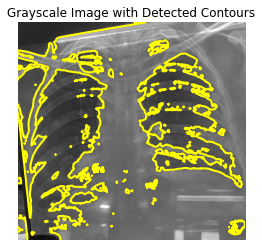

In [ ]:
#For each hole, plot the contour
for contour in contours:
    plt.plot(contour[:,1], contour[:,0], linewidth=2, color='yellow')
plt.imshow(gray_image, cmap='gray')
plt.axis('off')
plt.title('Grayscale Image with Detected Contours')

In [ ]:
from skimage.measure import label
labs, count = skimage.measure.label(binary, return_num=True)
print('{} holes were found in this x ray image.'.format(count))

131 holes were found in this x ray image.
